# Employee Attrition Prediction

### Business Problem

Dataset link: https://drive.google.com/file/d/1jJ0HWLmPVCWwlAHp9MzE584SKGu4Xu2W/view?usp=sharing

Determining which factors keep employeees at my company and which prompt others to leave. There is a need to know the factors which can be changed to prevent the loss of good people. We have to build binary machine learning classification model.
Which factors led to employee attrition?

Features:

**Education**

1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

**EnvironmentSatisfaction**

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobInvolvement**

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobSatisfaction**

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**PerformanceRating**

1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

**RelationshipSatisfaction**

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**WorkLifeBalance**

1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [720]:
url='C:/Users/beemu/Downloads/Projects data sets/Employee-Attrition.csv'
data=pd.read_csv(url)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [721]:
data.shape

(1470, 35)

In [722]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [723]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [724]:
#checking the length of the categorical columns
len(data.select_dtypes(include='object').columns)

9

In [725]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Restructuring the dataset

In [726]:
# Drop the following columns (makes no sense for target variable attrition prediction)
#EmployeeCount,EmployeeNumber,Over18,StandardHours

In [727]:
data['EmployeeCount'].nunique()

1

In [728]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [729]:
data=data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])

In [730]:
data.shape

(1470, 31)

### Checking missing data

In [731]:
data.isnull().values.any()

False

In [732]:
data.isnull().values.sum()

0

### Countplot

<AxesSubplot:xlabel='Attrition', ylabel='count'>

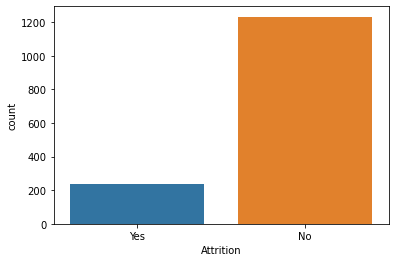

In [733]:
sns.countplot(data['Attrition'])

In [734]:
## Employees which left the company

(data.Attrition=='Yes').sum()

237

In [735]:
##Employees which did not leave the company
(data.Attrition=='No').sum()

1233

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

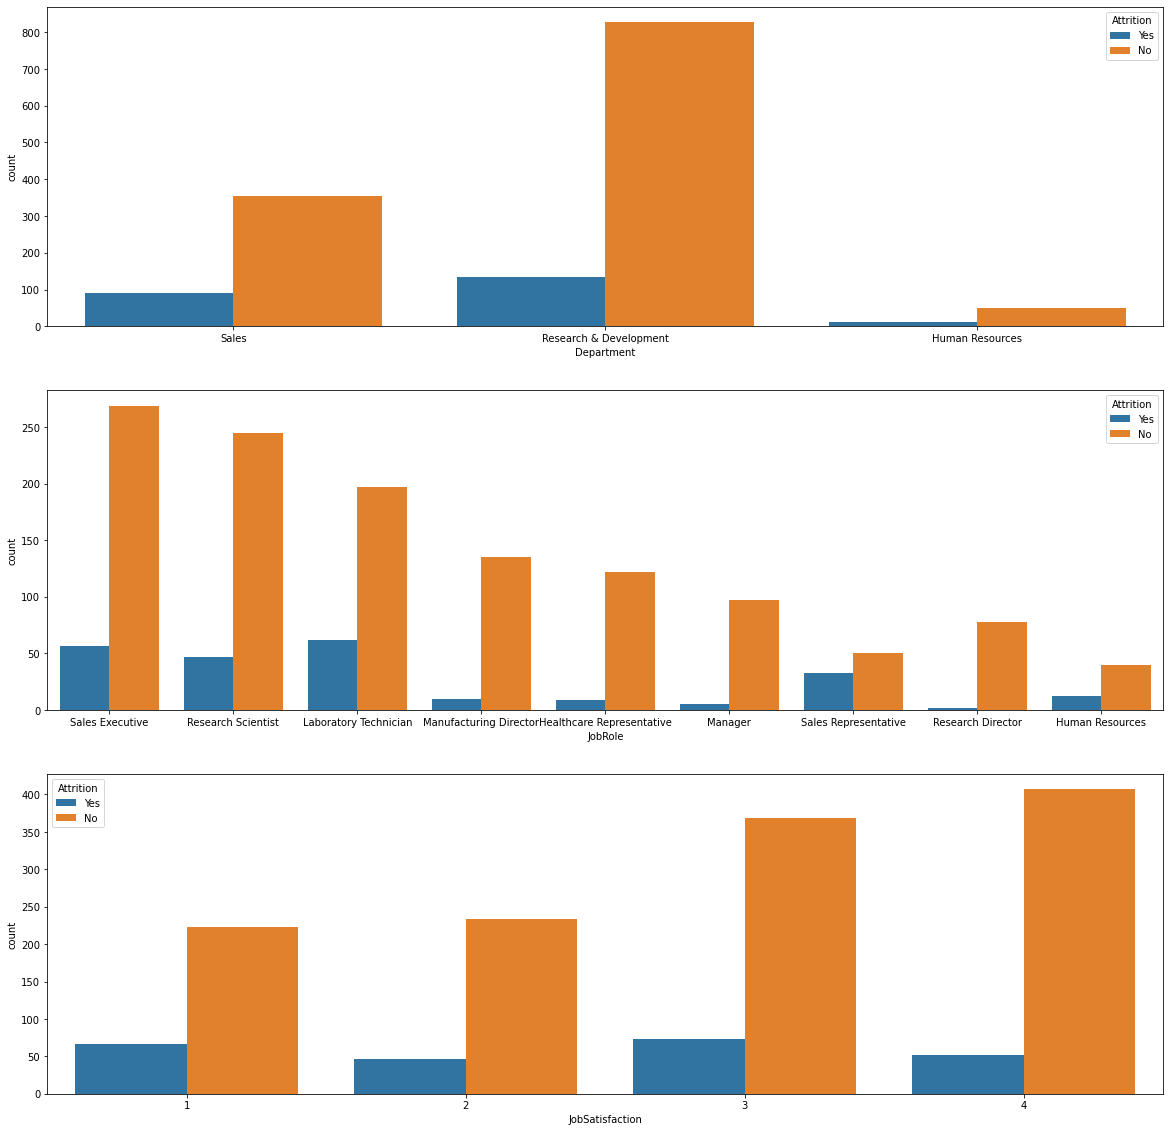

In [736]:
plt.figure(figsize=(20,20))
plt.subplot(311)
sns.countplot(x='Department',hue='Attrition',data=data)

plt.subplot(312)
sns.countplot(x='JobRole',hue='Attrition',data=data)

plt.subplot(313)
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)

In [737]:
# Yes means employee are leaving the company
# No means employees are satying with company.
#1st plot Sales and R&D employee are leaving the most
# 2nd Sales executive,laboratory Techniciansand sales represntatives are leaving the most
# 3rd Not much difference on the basis of Job statisfaction

### Correlation Matrix  and HeatMap

In [738]:
corr=data.corr()

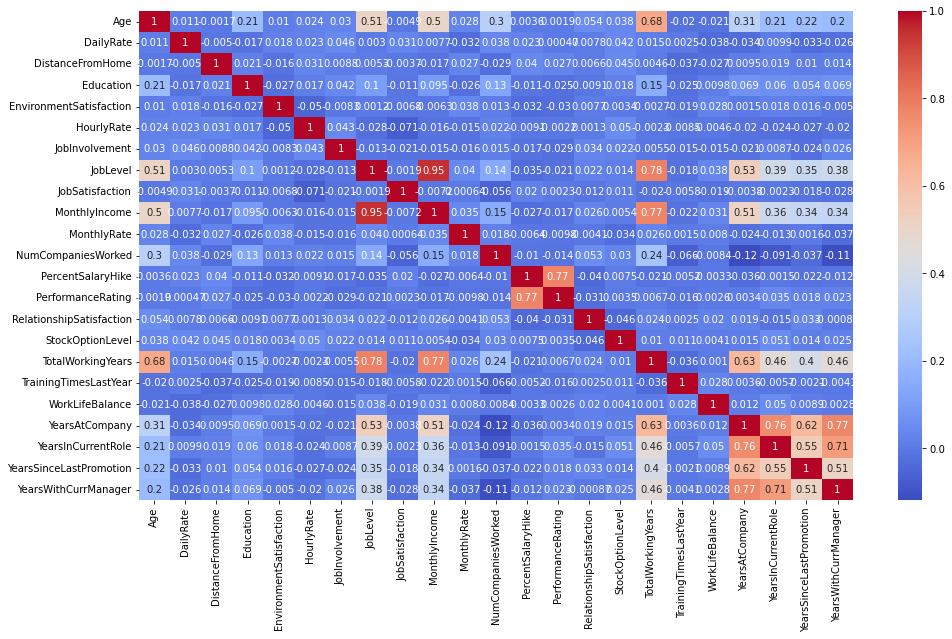

In [739]:
# Correlation Matrix
plt.figure(figsize=(16,9))
ax=sns.heatmap(corr,annot=True,cmap='coolwarm')


### Dealing With Categorical data

In [740]:
data.select_dtypes(include=('object')).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [741]:
len(data.select_dtypes(include=('object')).columns)

8

In [742]:
data.select_dtypes(include=['float64','int64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [743]:
len(data.select_dtypes(include=['float64','int64']).columns)

23

In [744]:
# One hot encoding
data=pd.get_dummies(data=data,drop_first=True)

In [745]:
data.shape

(1470, 45)

In [746]:
pd.set_option('display.max_columns', None)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [747]:
#Renaming the column name because it is the target variable 

data.rename(columns={'Attrition_Yes':'Attrition'},inplace=True)

In [748]:
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


### Splitting the dataset

In [749]:
# Matrix of features
x=data.drop(columns='Attrition')

# Traget varaiable
y=data['Attrition']

In [750]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=0)

In [751]:
x_train.shape

(1176, 44)

In [752]:
y_train.shape

(1176,)

In [753]:
y_test.shape

(294,)

In [754]:
x_test.shape

(294, 44)

### Feature Scaling

In [755]:
# For feature scaling wd use the standard class
# emoves the mean and scales each feature/variable to unit variance

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)       # fit transform for the x_train
x_test=sc.transform(x_test)             # For the x_test we use x_test


In [756]:
x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

In [757]:
x_test

array([[-0.08886552, -0.41164077,  0.10328995, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.41992946, -0.5595063 ,  1.94745459, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.19922017, -0.34510129,  1.08684442, ...,  1.11547067,
        -0.69900472,  1.62507442],
       ...,
       [-0.64063875, -1.36290899, -0.38848729, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377,  1.13108954, -0.88026453, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.06717794, -0.14259867, ...,  1.11547067,
        -0.69900472,  1.62507442]])

##  Building the model

We will try 3 basic classification models namely
1. Logistic regression
2. Random forest classifier
3. Support VEctor Machine

#### 1. Logistic Regression

In [758]:
from sklearn.linear_model import LogisticRegression



#### Evaluate model performance

In [759]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [760]:
acc = accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
ps=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print('The accuracy score of the model is  ',"{:.2f}".format(acc*100) ,' %' ) # accuracy of the model is 88.4 which is low
print('The recall score of the model is  ', "{:.2f}".format(rs*100),' %' )
print('The precision score of the model is  ', "{:.2f}".format(ps*100),' %' )
print('The f1 score of the model is  ' , "{:.2f}".format(f1*100),' %' )

print(cm) #lr is giving 237 and 23 correct and 26 and 8 incorrect predictions


The accuracy score of the model is   88.44  %
The recall score of the model is   46.94  %
The precision score of the model is   74.19  %
The f1 score of the model is   57.50  %
[[237   8]
 [ 26  23]]


In [761]:
results=pd.DataFrame([['Logistic Regression',acc,f1,ps,rs]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])


In [762]:
# CROSS VALIDATION

# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  87.67 %
Standard Deviation is 2.63 %


#### 2. Random Forest Classifier

In [763]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=0)
classifier_rf=classifier_rf.fit(x_train,y_train)
y_pred=classifier_rf.predict(x_test)

#### Evaluating Random Forest model performance

In [764]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
acc = accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
ps=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print('The accuracy score of the model is  ',"{:.2f}".format(acc*100) ,' %' ) # accuracy of the model is 88.4 which is low
print('The recall score of the model is  ', "{:.2f}".format(rs*100),' %' )
print('The precision score of the model is  ', "{:.2f}".format(ps*100),' %' )
print('The f1 score of the model is  ' , "{:.2f}".format(f1*100),' %' )

print(cm) #lr is giving 243 and 9 correct and 40 and 2 incorrect predictions

The accuracy score of the model is   85.71  %
The recall score of the model is   18.37  %
The precision score of the model is   81.82  %
The f1 score of the model is   30.00  %
[[243   2]
 [ 40   9]]


In [765]:
results1=pd.DataFrame([['Random Forest Classifier',acc,f1,ps,rs]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])
results2= results.append(results1)

In [766]:
# CROSS VALIDATION  RANDOM FOREST MODEL

# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  85.63 %
Standard Deviation is 1.59 %


### 3. Support Vector Machine

In [767]:
from sklearn.svm import SVC
classifier_sv=SVC(random_state=0)
classifier_sv=classifier_sv.fit(x_train,y_train)

y_pred= classifier_sv.predict(x_test)

#### Evaluating Support Vector Classifier Model

In [768]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
acc = accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
ps=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print('The accuracy score of the model is  ',"{:.2f}".format(acc*100) ,' %' ) # accuracy of the model is 88.4 which is low
print('The recall score of the model is  ', "{:.2f}".format(rs*100),' %' )
print('The precision score of the model is  ', "{:.2f}".format(ps*100),' %' )
print('The f1 score of the model is  ' , "{:.2f}".format(f1*100),' %' )

print(cm) #lr is giving 243 and 12 correct and 37 and 2 incorrect predictions

The accuracy score of the model is   86.73  %
The recall score of the model is   24.49  %
The precision score of the model is   85.71  %
The f1 score of the model is   38.10  %
[[243   2]
 [ 37  12]]


In [769]:
results1=pd.DataFrame([['Support Vector Machine',acc,f1,ps,rs]], 
                    columns=['Model','Accuracy','F1','Precision','Recall'])
results3= results1.append(results2,ignore_index=True)
results3

,Model,Accuracy,F1,Precision,Recall
0,Support Vector Machine,0.867347,0.380952,0.857143,0.244898
1,Logistic Regression,0.884354,0.575000,0.741935,0.469388
2,Random Forest Classifier,0.857143,0.300000,0.818182,0.183673


In [770]:
# CROSS VALIDATION  SVC MODEL

# we are going to use cv=10 which means 10 datasets from X-train and y_train 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_sv,X=x_train,y=y_train,cv=10)

print("Accuracy is  {:.2f} %". format(accuracies.mean()*100))

print("Standard Deviation is {:.2f} %". format(accuracies.std()*100))

Accuracy is  86.22 %
Standard Deviation is 0.94 %


After the perfomance evelauations i settled for logistic regression since it had the highest accuracy measure compared to Random forest and Support Vector Machine algorithms.

## Randomised Search to get the best parameters for Logistic Regression Model {Parameter tuning}

In [792]:

from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

parameters={
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.25,0.5,0.75,1,1.25,1.5,1.75,2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[50,100,500,200,500]
    
}


In [793]:
parameters

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [50, 100, 500, 200, 500]}

In [794]:
random_cv=RandomizedSearchCV(estimator=classifier_lr,param_distributions=parameters,n_iter=10, scoring='roc_auc',n_jobs=-1,cv=5,verbose=5)
random_cv=random_cv.fit(x_train,y_train)

y_pred=random_cv.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [801]:
random_cv.best_estimator_

LogisticRegression(C=1, max_iter=50, penalty='l1', random_state=0,
                   solver='liblinear')

In [802]:
random_cv.best_score_

0.8221745073468292

## Final Model-Logistic regression

In [806]:
classifier=LogisticRegression(C=2.0, max_iter=500, random_state=0, solver='liblinear',penalty='l1')
classifier=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [807]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
acc = accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
ps=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

print('The accuracy score of the model is  ',"{:.2f}".format(acc*100) ,' %' ) # accuracy of the model is 88.4 which is low
print('The recall score of the model is  ', "{:.2f}".format(rs*100),' %' )
print('The precision score of the model is  ', "{:.2f}".format(ps*100),' %' )
print('The f1 score of the model is  ' , "{:.2f}".format(f1*100),' %' )

print(cm) #lr is giving 237 and 23 correct and 26 and 8 incorrect predictions

The accuracy score of the model is   88.44  %
The recall score of the model is   46.94  %
The precision score of the model is   74.19  %
The f1 score of the model is   57.50  %
[[237   8]
 [ 26  23]]


## Predicting a single obs

In [805]:
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [808]:
single_obs=[[41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1]]

In [809]:
single_obs

[[41,
  1102,
  1,
  2,
  2,
  94,
  3,
  2,
  4,
  5993,
  19479,
  8,
  11,
  3,
  1,
  0,
  8,
  0,
  1,
  6,
  4,
  0,
  5,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1]]

In [810]:
classifier.predict(sc.transform(single_obs)) 

array([1], dtype=uint8)

#### The prediction model is working well @88% percent accuracy it has predicted well fro the first empolyee. We can improve the performance of the logistic regression model if we change parameter values and test several times